In [1]:
import pandas as pd
matches = pd.read_csv('match-results.csv') #returns a data frame object
matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True


In [2]:
# (no of records, no off columns in df)
matches.shape 

(41586, 9)

In [3]:
matches.describe()

,home_score,away_score
count,41586.000000,41586.000000
mean,1.745756,1.187587
std,1.753780,1.405323
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [4]:
matches.values 

array([['1872-11-30', 'Scotland', 'England', ..., 'Glasgow', 'Scotland',
        False],
       ['1873-03-08', 'England', 'Scotland', ..., 'London', 'England',
        False],
       ['1874-03-07', 'Scotland', 'England', ..., 'Glasgow', 'Scotland',
        False],
       ...,
       ['2020-01-15', 'Canada', 'Iceland', ..., 'Irvine',
        'United States', True],
       ['2020-01-19', 'El Salvador', 'Iceland', ..., 'Carson',
        'United States', True],
       ['2020-02-01', 'United States', 'Costa Rica', ..., 'Carson',
        'United States', False]], dtype=object)

In [5]:
matches.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [6]:
# Getting all Matches on Non Neutral Venues
nonNeutralMatches = matches.loc[matches['neutral']==False]
nonNeutralMatches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41571,2019-12-05,Qatar,Saudi Arabia,0,1,Gulf Cup,Al Wakrah,Qatar,False
41574,2019-12-11,South Korea,Hong Kong,2,0,EAFF Championship,Busan,South Korea,False
41576,2019-12-15,South Korea,China PR,1,0,EAFF Championship,Busan,South Korea,False
41578,2019-12-18,South Korea,Japan,1,0,EAFF Championship,Busan,South Korea,False


In [7]:
# Answers 1 & 2
# Home Team Avg Goals = 1.78
# Away Team Avg Goals = 1.12
nonNeutralMatches.describe()

,home_score,away_score
count,31304.000000,31304.000000
mean,1.778271,1.119154
std,1.725963,1.291092
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,3.000000,2.000000
max,31.000000,15.000000


In [8]:
# Alternatively
avgHomeGoals=nonNeutralMatches.home_score.mean()
avgAwayGoals=nonNeutralMatches.away_score.mean()
print(f'Home:{avgHomeGoals}\nAway:{avgAwayGoals}')

Home:1.778271147457194
Away:1.1191541017122413


In [9]:
matches['total_goals'] = matches['home_score'] + matches['away_score']
# now with total_goals
matches.describe()

,home_score,away_score,total_goals
count,41586.000000,41586.000000,41586.000000
mean,1.745756,1.187587,2.933343
std,1.753780,1.405323,2.092804
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,1.000000,1.000000,3.000000
75%,2.000000,2.000000,4.000000
max,31.000000,21.000000,31.000000


Text(0, 0.5, 'Total Goals Scored')

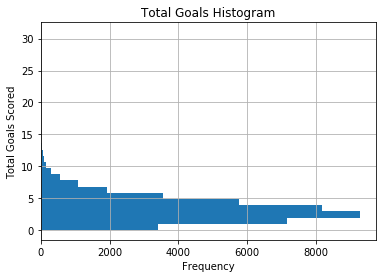

In [10]:
# Answer 3 : Histogram
hist_plot = matches['total_goals'].plot.hist(bins=32, orientation='horizontal', grid=True)
hist_plot.set_title('Total Goals Histogram')
hist_plot.set_xlabel('Frequency')
hist_plot.set_ylabel('Total Goals Scored')

In [11]:
# NTS 1: Line Below causes SettingwithCopyWarning: 
# nonNeutralMatches['home_win'] = nonNeutralMatches['home_score'] > nonNeutralMatches['away_score']
# Solution Resources: 
# https://www.dataquest.io/blog/settingwithcopywarning/
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

#
matches['home_win'] = matches['home_score'] > matches['away_score']
totalMatches = len(nonNeutralMatches)
totalMatches

# NTS 2: See that I did not have to reassign nonNeutralMatches, it automatically gets the the home_win colum
# (actually no), its just used a saved version, saer this way 
# home wins
nonNeutralMatches = matches.loc[matches['neutral']==False]
homeWinsDF = nonNeutralMatches.loc[nonNeutralMatches['home_win']==True]
homeWins = len(homeWinsDF)
homeWinPercent = (homeWins/totalMatches)*100
# Answer 4
print(f'Answer4::\n Home Wins: {homeWins}\n Matches : {totalMatches}\n Win %: {homeWinPercent}%')
homeWinsDF

Answer4::
 Home Wins: 15806
 Matches : 31304
 Win %: 50.49194991055456%


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals,home_win
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,True
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,True
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,True
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,4,True
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,9,True
...,...,...,...,...,...,...,...,...,...,...,...
41566,2019-12-02,Qatar,United Arab Emirates,4,2,Gulf Cup,Doha,Qatar,False,6,True
41574,2019-12-11,South Korea,Hong Kong,2,0,EAFF Championship,Busan,South Korea,False,2,True
41576,2019-12-15,South Korea,China PR,1,0,EAFF Championship,Busan,South Korea,False,1,True
41578,2019-12-18,South Korea,Japan,1,0,EAFF Championship,Busan,South Korea,False,1,True


In [12]:
#Getting all the unique values in Tournaments field
allTournaments = matches.tournament.unique()
allTournaments

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [13]:
# Revisit This: Not Happy with this solution, must be a better way match multiple conditions on a column, helper function maybe
# So I only took the World Cup (quali+final). Wasn't entirely sure which ones to consider
fifaMatchesDF = matches.loc[((matches['tournament']=='FIFA World Cup' ) | (matches['tournament']=='FIFA World Cup qualification'))]
print(type(fifaMatchesDF))
homeGoalsScored = fifaMatchesDF.groupby('home_team').home_score.sum()
awayGoalsScored = fifaMatchesDF.groupby('away_team').away_score.sum()

<class 'pandas.core.frame.DataFrame'>


In [14]:
homeGoalsScored
print(type(homeGoalsScored))
print(homeGoalsScored.keys())
awayGoalsScored
print(type(awayGoalsScored))
print(awayGoalsScored.keys())

<class 'pandas.core.series.Series'>
Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Vanuatu', 'Venezuela', 'Vietnam', 'Vietnam Republic', 'Wales', 'Yemen',
       'Yemen DPR', 'Yugoslavia', 'Zambia', 'Zimbabwe'],
      dtype='object', name='home_team', length=218)
<class 'pandas.core.series.Series'>
Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Vanuatu', 'Venezuela', 'Vietnam', 'Vietnam Republic', 'Wales', 'Yemen',
       'Yemen DPR', 'Yugoslavia', 'Zambia', 'Zimbabwe'],
      dtype='object', name='away_team', length=219)


In [15]:
#NTS: not entirely sure how level works
allGoalsScored = pd.concat([homeGoalsScored,awayGoalsScored]).sum(level=0)
allGoalsScored

Afghanistan        12
Albania            72
Algeria           136
American Samoa      1
Andorra            14
                 ... 
Yemen DPR           4
Yugoslavia        185
Zambia            149
Zimbabwe           64
Timor-Leste         2
Length: 219, dtype: int64

In [16]:
allGoalsScored[[allGoalsScored.idxmax()]]
# And Germany Wins: Not surprised

Germany    518
dtype: int64